In [2]:
import pandas as pd

# Primary Size

## Read and clean data

In [3]:
df = pd.read_csv("snorql-csv-ps.csv") # primary size

In [4]:
df = df.astype(str)

In [5]:
df = df[~df.value.str.contains('\?')] # applicable for primary size

In [6]:
df = df.reset_index()

## Split range values

In [7]:
df["with_std"] = df[df.value_range.str.contains('/')].value_range.str.split(" \+/- ")

In [8]:
df["with_range"] = df[df.value_range.str.contains('-')&~df.value_range.str.contains('/')].value_range.str.split('-')

In [9]:
df["stdev"] = 0

In [10]:
for i in df["with_std"].dropna().index:
    df.value.loc[i] = df.with_std.loc[i][0]
    df['stdev'].loc[i] = df.with_std.loc[i][1]

/Users/Jeaphianne/miniconda3/lib/python3.6/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [11]:
for i in df["with_range"].dropna().index:
    av = (float(df.with_range.iloc[i][0])+float(df.with_range.iloc[i][1]))/2
    df.value.iloc[i] = av
    df['stdev'].iloc[i] = av-float(df.with_range.iloc[i][0])

/Users/Jeaphianne/miniconda3/lib/python3.6/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [12]:
df.value=df.value.astype(float)
df.stdev = df.stdev.astype(float)

In [13]:
df

,index,ERM,mlabel,mlabel2,KE,doi,measurement,medium,value_range,value,unit,with_std,with_range,stdev
0,0,https://nanocommons.github.io/identifiers/regi...,6 TiO2 NP A (anatase/rutile),titanium dioxide nanoparticle,interference with signalling molecules,https://doi.org/10.1166/jnn.2019.16737,primary size,nan,nan,31.00,http://purl.obolibrary.org/obo/UO_0000018,NaN,NaN,0.00
1,1,https://nanocommons.github.io/identifiers/regi...,6 TiO2 NP A (anatase/rutile),titanium dioxide nanoparticle,DNA damage,https://doi.org/10.1166/jnn.2019.16737,primary size,nan,nan,31.00,http://purl.obolibrary.org/obo/UO_0000018,NaN,NaN,0.00
2,2,https://nanocommons.github.io/identifiers/regi...,6 TiO2 NP A (anatase/rutile),titanium dioxide nanoparticle,ROS production,https://doi.org/10.1166/jnn.2019.16737,primary size,nan,nan,31.00,http://purl.obolibrary.org/obo/UO_0000018,NaN,NaN,0.00
3,3,https://nanocommons.github.io/identifiers/regi...,6 TiO2 NP B (anatase/rutile),titanium dioxide nanoparticle,DNA damage,https://doi.org/10.1166/jnn.2019.16737,primary size,nan,nan,59.00,http://purl.obolibrary.org/obo/UO_0000018,NaN,NaN,0.00
4,4,https://nanocommons.github.io/identifiers/regi...,6 TiO2 NP B (anatase/rutile),titanium dioxide nanoparticle,ROS production,https://doi.org/10.1166/jnn.2019.16737,primary size,nan,nan,59.00,http://purl.obolibrary.org/obo/UO_0000018,NaN,NaN,0.00
5,5,https://nanocommons.github.io/identifiers/regi...,6 TiO2 NP B (anatase/rutile),titanium dioxide nanoparticle,proliferation,https://doi.org/10.1166/jnn.2019.16737,primary size,nan,nan,59.00,http://purl.obolibrary.org/obo/UO_0000018,NaN,NaN,0.00
6,6,https://nanocommons.github.io/identifiers/regi...,6 TiO2 NP B (anatase/rutile),titanium dioxide nanoparticle,cytoskeleton remodeling,https://doi.org/10.1166/jnn.2019.16737,primary size,nan,nan,59.00,http://purl.obolibrary.org/obo/UO_0000018,NaN,NaN,0.00
7,7,https://nanocommons.github.io/identifiers/regi...,6 TiO2 NP B (anatase/rutile),titanium dioxide nanoparticle,interference with signalling molecules,https://doi.org/10.1166/jnn.2019.16737,primary size,nan,nan,59.00,http://purl.obolibrary.org/obo/UO_0000018,NaN,NaN,0.00
8,8,https://nanocommons.github.io/identifiers/regi...,6 TiO2 NP C (anatase),titanium dioxide nanoparticle,ROS production,https://doi.org/10.1166/jnn.2019.16737,primary size,nan,nan,25.00,http://purl.obolibrary.org/obo/UO_0000018,NaN,NaN,0.00
9,9,https://nanocommons.github.io/identifiers/regi...,6 TiO2 NP C (anatase),titanium dioxide nanoparticle,proliferation,https://doi.org/10.1166/jnn.2019.16737,primary size,nan,nan,25.00,http://purl.obolibrary.org/obo/UO_0000018,NaN,NaN,0.00


### Change micrometer values to nm

Only applicable for certain data types

In [14]:
# df_microm=df[df.unit=='http://www.ebi.ac.uk/efo/EFO_0001724']
# df_microm.value = df_microm.value.multiply(1000)
# df_microm.stdev = df_microm.stdev.multiply(1000)

In [15]:
## For Primary Size

df.loc[79,'value'] = df.loc[79,'value']*1000
df.loc[79,'stdev'] = df.loc[79,'stdev']*1000
df.loc[81,'value'] = df.loc[81,'value']*1000
df.loc[81,'stdev'] = df.loc[81,'stdev']*1000
df.loc[82,'value'] = df.loc[82,'value']*1000
df.loc[82,'stdev'] = df.loc[82,'stdev']*1000
df.loc[83,'value'] = df.loc[83,'value']*1000
df.loc[83,'stdev'] = df.loc[83,'stdev']*1000

## Make groups of NP types

In [16]:
df2 = df.copy()

In [17]:
df2['kind'] = '#fbe6e1'

In [18]:
cnt_list = df2[df2.mlabel2.str.contains('nanotube')].ERM.tolist()

In [19]:
carbon_list = df2[df2.mlabel2.str.contains('printex|fullerene|graphene')].ERM.tolist()

In [20]:
titanium_list = df2[df2.mlabel2.str.contains('titanium')].ERM.tolist()

In [21]:
silver_list = df2[df2.mlabel2.str.contains('silver')].ERM.tolist()

In [22]:
other_list = []
metal_oxide_list = []
total_list =  cnt_list + carbon_list + titanium_list + silver_list
for ERM in df2.ERM.unique():
    if ERM not in total_list :
        if df2[df2.ERM==ERM].mlabel2.str.contains('Fe3O4|Fe2O3|oxide').unique()[0]:
            metal_oxide_list.append(ERM)
        else:
            other_list.append(ERM)

In [23]:
df_cnt = df2[df2.ERM.isin(cnt_list)]
df_cnt['kind'] = '#485868'

df_carbon = df2[df2.ERM.isin(carbon_list)]
df_carbon['kind'] = '#bcbdc1'

df_titanium = df2[df2.ERM.isin(titanium_list)]
df_titanium['kind'] = '#f27360'

df_silver = df2[df2.ERM.isin(silver_list)]
df_silver['kind'] = '#f3c766'

df_mo = df2[df2.ERM.isin(metal_oxide_list)]
df_mo['kind'] = '#9fc2bb'

df_other = df2[df2.ERM.isin(other_list)]

/Users/Jeaphianne/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/Jeaphianne/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/Jeaphianne/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.py

In [24]:
df3 = pd.concat([df_cnt, df_carbon, df_titanium, df_silver, df_mo, df_other], ignore_index=True)

In [25]:
df3

,index,ERM,mlabel,mlabel2,KE,doi,measurement,medium,value_range,value,unit,with_std,with_range,stdev,kind
0,48,https://nanocommons.github.io/identifiers/regi...,CNT,carbon nanotubes,No effect,https://doi.org/10.1002/adma.201604580,primary size,nan,392 +/- 57,392.00,http://purl.obolibrary.org/obo/UO_0000018,"[392, 57]",NaN,57.00,#485868
1,79,https://nanocommons.github.io/identifiers/regi...,MWCNT (Mitsui XNRi-7),multi-walled carbon nanotubes,Cellular sensing of substance or substance ind...,https://doi.org/10.1186/s12989-017-0218-0,primary size,nan,nan,3860.00,http://www.ebi.ac.uk/efo/EFO_0001724,NaN,NaN,0.00,#485868
2,80,https://nanocommons.github.io/identifiers/regi...,MWCNTS (Mitsui-7),multi-walled carbon nanotubes,Interaction with lung cells,https://doi.org/10.1021/acsnano.9b06860,primary size,nan,nan,NaN,nan,NaN,NaN,0.00,#485868
3,81,https://nanocommons.github.io/identifiers/regi...,MWCNTS (Mitsui-7),multi-walled carbon nanotubes,Cellular sensing of the substance-induced dama...,https://doi.org/10.1186/s12989-016-0125-9,primary size,nan,5.73 +/- 3.67,5730.00,http://www.ebi.ac.uk/efo/EFO_0001724,"[5.73, 3.67]",NaN,3670.00,#485868
4,82,https://nanocommons.github.io/identifiers/regi...,MWCNTS (NM-401),multi-walled carbon nanotubes,Cellular sensing of the substance-induced dama...,https://doi.org/10.1186/s12989-016-0125-9,primary size,nan,0.85 +/- 0.46,850.00,http://www.ebi.ac.uk/efo/EFO_0001724,"[0.85, 0.46]",NaN,460.00,#485868
5,83,https://nanocommons.github.io/identifiers/regi...,MWCNTS (NRCWE-026),multi-walled carbon nanotubes,Cellular sensing of the substance-induced dama...,https://doi.org/10.1186/s12989-016-0125-9,primary size,nan,4.05 +/- 2.37,4050.00,http://www.ebi.ac.uk/efo/EFO_0001724,"[4.05, 2.37]",NaN,2370.00,#485868
6,84,https://nanocommons.github.io/identifiers/regi...,MWCNTS (Nanocyl),multi-walled carbon nanotubes,Interaction with lung cells,https://doi.org/10.1021/acsnano.9b06860,primary size,nan,nan,NaN,nan,NaN,NaN,0.00,#485868
7,85,https://nanocommons.github.io/identifiers/regi...,MWCNTS - pristine,multi-walled carbon nanotubes,induction of IL6,https://doi.org/10.1002/smll.201603830,primary size,nan,nan,NaN,nan,NaN,NaN,0.00,#485868
8,86,https://nanocommons.github.io/identifiers/regi...,MWCNTS-COOH,multi-walled carbon nanotubes carboxylated,induction of IL6,https://doi.org/10.1002/smll.201603830,primary size,nan,nan,NaN,nan,NaN,NaN,0.00,#485868
9,87,https://nanocommons.github.io/identifiers/regi...,MWCNTS-COOH,multi-walled carbon nanotubes,Induction of IL1? and TNF?,https://doi.org/10.1039/C6NR06041B,primary size,nan,250-450,350.00,http://purl.obolibrary.org/obo/UO_0000018,NaN,"[250, 450]",100.00,#485868


In [26]:
df3.columns

Index(['index', 'ERM', 'mlabel', 'mlabel2', 'KE', 'doi', 'measurement',
       'medium', 'value_range', 'value', 'unit', 'with_std', 'with_range',
       'stdev', 'kind'],
      dtype='object')

In [27]:
df3=df3.sort_values(by="value").reset_index()

In [28]:
df3=df3[['ERM', 'mlabel', 'mlabel2', 'KE', 'doi',
       'measurement', 'medium', 'value_range', 'value', 'unit', 'with_std',
       'with_range', 'stdev', 'kind']].reset_index()

In [29]:
df3

,index,ERM,mlabel,mlabel2,KE,doi,measurement,medium,value_range,value,unit,with_std,with_range,stdev,kind
0,0,https://nanocommons.github.io/identifiers/regi...,GO,graphene oxide,Alter genome methylation,https://doi.org/10.1002/adma.201604580,primary size,nan,nan,1.00,http://purl.obolibrary.org/obo/UO_0000018,NaN,NaN,0.00,#bcbdc1
1,1,https://nanocommons.github.io/identifiers/regi...,CeO2 NP-C,27% zirconium oxide-doped cerium oxide nanopar...,ROS production,https://doi.org/10.1039/C8EN00071A,primary size,nan,4.6 +/- 1.4,4.60,http://purl.obolibrary.org/obo/UO_0000018,"[4.6, 1.4]",NaN,1.40,#9fc2bb
2,2,https://nanocommons.github.io/identifiers/regi...,CeO2 NP-C,27% zirconium oxide-doped cerium oxide nanopar...,DNA damage,https://doi.org/10.1039/C8EN00071A,primary size,nan,4.6 +/- 1.4,4.60,http://purl.obolibrary.org/obo/UO_0000018,"[4.6, 1.4]",NaN,1.40,#9fc2bb
3,3,https://nanocommons.github.io/identifiers/regi...,CeO2 NP-A,cerium oxide nanoparticle,ROS production,https://doi.org/10.1039/C8EN00071A,primary size,nan,4.7 +/- 1.4,4.70,http://purl.obolibrary.org/obo/UO_0000018,"[4.7, 1.4]",NaN,1.40,#9fc2bb
4,4,https://nanocommons.github.io/identifiers/regi...,CeO2 NP-A,cerium oxide nanoparticle,DNA damage,https://doi.org/10.1039/C8EN00071A,primary size,nan,4.7 +/- 1.4,4.70,http://purl.obolibrary.org/obo/UO_0000018,"[4.7, 1.4]",NaN,1.40,#9fc2bb
5,5,https://nanocommons.github.io/identifiers/regi...,CeO2 NP-E,78% zirconium oxide-doped cerium oxide nanopar...,ROS production,https://doi.org/10.1039/C8EN00071A,primary size,nan,4.7 +/- 1.4,4.70,http://purl.obolibrary.org/obo/UO_0000018,"[4.7, 1.4]",NaN,1.40,#9fc2bb
6,6,https://nanocommons.github.io/identifiers/regi...,CeO2 NP-E,78% zirconium oxide-doped cerium oxide nanopar...,DNA damage,https://doi.org/10.1039/C8EN00071A,primary size,nan,4.7 +/- 1.4,4.70,http://purl.obolibrary.org/obo/UO_0000018,"[4.7, 1.4]",NaN,1.40,#9fc2bb
7,7,https://nanocommons.github.io/identifiers/regi...,AgNPs 5,spherelike silver nanoparticle,increased the number and length of protrusions,https://doi.org/10.1021/acssuschemeng.8b01744,primary size,nan,5.6 +/- 1.27,5.60,http://purl.obolibrary.org/obo/UO_0000018,"[5.6, 1.27]",NaN,1.27,#f3c766
8,8,https://nanocommons.github.io/identifiers/regi...,AgNPs 5,spherelike silver nanoparticle,activation of post-transcriptional mechanism,https://doi.org/10.1021/acssuschemeng.8b01744,primary size,nan,5.6 +/- 1.27,5.60,http://purl.obolibrary.org/obo/UO_0000018,"[5.6, 1.27]",NaN,1.27,#f3c766
9,9,https://nanocommons.github.io/identifiers/regi...,AgNPs 5,spherelike silver nanoparticle,activation of Nrf2 singling pathway and increa...,https://doi.org/10.1021/acssuschemeng.8b01744,primary size,nan,5.6 +/- 1.27,5.60,http://purl.obolibrary.org/obo/UO_0000018,"[5.6, 1.27]",NaN,1.27,#f3c766


## Split df into NPs that cause DNA damage and NPs that don't

In [30]:
DNA_list = df3[df3.KE=="DNA damage"].ERM.tolist()
df_DNA = df3[df3.KE=="DNA damage"]

In [31]:
not_DNA_list = []
for ERM in df3.ERM.unique():
    if ERM not in DNA_list:
        not_DNA_list.append(ERM)
        
df_not_DNA = df3[df3.ERM.isin(not_DNA_list)][['ERM', 'mlabel', 'mlabel2', 
                                            'doi', 'value_range', 'value', 'unit', 'stdev', 'kind']].drop_duplicates()

In [32]:
df_not_DNA = df_not_DNA.reset_index()

In [33]:
df_not_DNA.reset_index()

,level_0,index,ERM,mlabel,mlabel2,doi,value_range,value,unit,stdev,kind
0,0,0,https://nanocommons.github.io/identifiers/regi...,GO,graphene oxide,https://doi.org/10.1002/adma.201604580,nan,1.00,http://purl.obolibrary.org/obo/UO_0000018,0.00,#bcbdc1
1,1,7,https://nanocommons.github.io/identifiers/regi...,AgNPs 5,spherelike silver nanoparticle,https://doi.org/10.1021/acssuschemeng.8b01744,5.6 +/- 1.27,5.60,http://purl.obolibrary.org/obo/UO_0000018,1.27,#f3c766
2,2,10,https://nanocommons.github.io/identifiers/regi...,CeO2 M,cerium oxide nanoparticle,https://doi.org/10.1166/jnn.2019.16737,nan,8.00,http://purl.obolibrary.org/obo/UO_0000018,0.00,#9fc2bb
3,3,11,https://nanocommons.github.io/identifiers/regi...,Fe3O4,Fe3O4 nanoparticle,https://doi.org/10.1021/acsnano.5b05524,nan,13.00,http://purl.obolibrary.org/obo/UO_0000018,0.00,#9fc2bb
4,4,13,https://nanocommons.github.io/identifiers/regi...,Printex 90 carbonblack nanoparticles (CBNP),printex 90 carbon black nanoparticle,https://doi.org/10.1016/j.tox.2012.10.014,nan,14.00,http://purl.obolibrary.org/obo/UO_0000018,0.00,#bcbdc1
5,5,15,https://nanocommons.github.io/identifiers/regi...,nCeO2,cerium oxide nanoparticle,https://doi.org/10.1021/acssuschemeng.8b01744,15.26 +/- 2.03,15.26,http://purl.obolibrary.org/obo/UO_0000018,2.03,#9fc2bb
6,6,19,https://nanocommons.github.io/identifiers/regi...,nFe3O4,Fe3O4 nanoparticle,https://doi.org/10.1021/acssuschemeng.8b01744,17.23 +/- 1.66,17.23,http://purl.obolibrary.org/obo/UO_0000018,1.66,#9fc2bb
7,7,22,https://nanocommons.github.io/identifiers/regi...,nFe2O3,Fe2O3 nanoparticle,https://doi.org/10.1021/acssuschemeng.8b01744,17.92 +/- 1.96,17.92,http://purl.obolibrary.org/obo/UO_0000018,1.96,#9fc2bb
8,8,26,https://nanocommons.github.io/identifiers/regi...,nZnO,zinc oxide nanoparticle,https://doi.org/10.1021/acssuschemeng.8b01744,19.04 +/- 3.55,19.04,http://purl.obolibrary.org/obo/UO_0000018,3.55,#9fc2bb
9,9,29,https://nanocommons.github.io/identifiers/regi...,nLa2O3,lanthanum oxide nanoparticle,https://doi.org/10.1021/acssuschemeng.8b01744,19.93 +/- 2.17,19.93,http://purl.obolibrary.org/obo/UO_0000018,2.17,#9fc2bb


In [37]:
df_plot = pd.concat([df_DNA.reset_index(), df_not_DNA.reset_index()], ignore_index=True)

In [41]:
df_plot=df_plot[['ERM', 'KE', 'doi', 'kind', 'measurement', 'medium',
       'mlabel', 'mlabel2', 'stdev', 'unit', 'value', 'value_range',
       'with_range', 'with_std']]

In [44]:
df_plot=df_plot.sort_values('value').reset_index()

In [47]:
df_plot=df_plot.reset_index()

In [ ]:
df_plot[df_plot.KE=="DNA damage"]

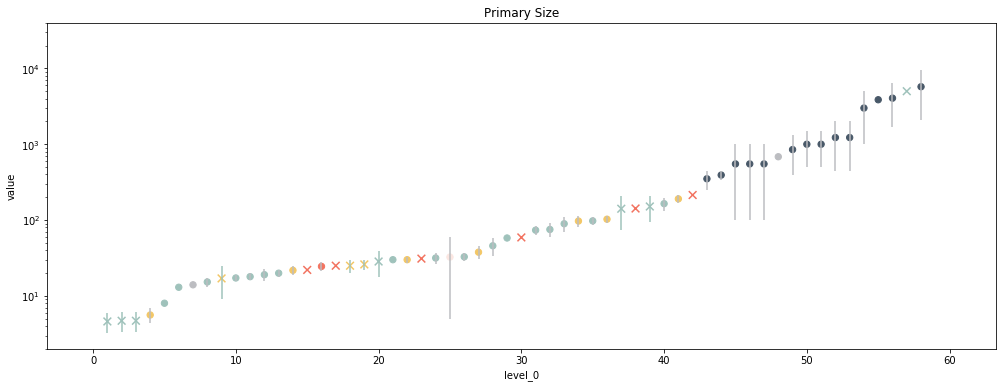

In [52]:
ax = df_plot[df_plot.KE=="DNA damage"].plot(kind = "scatter", x = "level_0", y = "value", title="Primary Size",
                      color = df_plot[df_plot.KE=="DNA damage"].kind, logy = True, 
                                            yerr = df_plot[df_plot.KE=="DNA damage"].stdev, figsize = (17, 6), 
                      s=60, ylim = (2,40000), marker =  'x')

df_plot[df_plot.KE!="DNA damage"].plot(kind = "scatter", x = "level_0", y = "value", 
                              color = df_plot[df_plot.KE!="DNA damage"].kind, logy = True, 
                              yerr = df_plot[df_plot.KE!="DNA damage"].stdev, figsize = (17, 6),
                              s=40, ylim = (2,40000), marker =  'o', ax=ax)

# plt.show()

In [ ]:
pd.qcut(df3.value, q=8).value_counts()

In [ ]:
# see also https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html

# Shape

In [ ]:
df = pd.read_csv("snorql-csv-shape.csv")

In [ ]:
df = df.astype(str)

In [ ]:
df.value.value_counts()

In [ ]:
df.value.value_counts().plot(kind='barh')

# Zeta potential

## Read and clean data

In [ ]:
# df = pd.read_csv("snorql-csv-hd.csv")
df = pd.read_csv("snorql-csv-zp.csv")

In [ ]:
df = df.astype(str)

In [ ]:
df=df[df.medium.str.contains("water|nan")]

In [ ]:
df.groupby(['KE', 'medium', 'doi']).count()

In [ ]:
df

## Split range values

In [ ]:
df["with_std"] = df[df.value_range.str.contains('/')].value_range.str.split(" \+/- ")

In [ ]:
df["with_range"] = df[df.value_range.str.contains('-')&~df.value_range.str.contains('/')].value_range.str.split('-')

In [ ]:
df["stdev"] = 0

In [ ]:
for i in df["with_std"].dropna().index:
    df.value.loc[i] = df.with_std.loc[i][0]
    df['stdev'].loc[i] = df.with_std.loc[i][1]

In [ ]:
for i in df["with_range"].dropna().index:
    av = (float(df.with_range.loc[i][0])+float(df.with_range.loc[i][1]))/2
    df.value.loc[i] = av
    df['stdev'].loc[i] = av-float(df.with_range.loc[i][0])

In [ ]:
df.value=df.value.astype(float)
df.stdev = df.stdev.astype(float)

In [ ]:
df.value.nunique()

In [ ]:
df

## Make groups of NP types

In [ ]:
df2 = df.copy()

In [ ]:
df2['kind'] = '#fbe6e1'

In [ ]:
cnt_list = df2[df2.mlabel2.str.contains('nanotube')].ERM.tolist()

In [ ]:
carbon_list = df2[df2.mlabel2.str.contains('printex|fullerene|graphene')].ERM.tolist()

In [ ]:
titanium_list = df2[df2.mlabel2.str.contains('titanium')].ERM.tolist()

In [ ]:
silver_list = df2[df2.mlabel2.str.contains('silver')].ERM.tolist()

In [ ]:
other_list = []
metal_oxide_list = []
total_list =  cnt_list + carbon_list + titanium_list + silver_list
for ERM in df2.ERM.unique():
    if ERM not in total_list :
        if df2[df2.ERM==ERM].mlabel2.str.contains('Fe3O4|Fe2O3|oxide').unique()[0]:
            metal_oxide_list.append(ERM)
        else:
            other_list.append(ERM)

In [ ]:
df_cnt = df2[df2.ERM.isin(cnt_list)]
df_cnt['kind'] = '#485868'

df_carbon = df2[df2.ERM.isin(carbon_list)]
df_carbon['kind'] = '#bcbdc1'

df_titanium = df2[df2.ERM.isin(titanium_list)]
df_titanium['kind'] = '#f27360'

df_silver = df2[df2.ERM.isin(silver_list)]
df_silver['kind'] = '#f3c766'

df_mo = df2[df2.ERM.isin(metal_oxide_list)]
df_mo['kind'] = '#9fc2bb'

df_other = df2[df2.ERM.isin(other_list)]

In [ ]:
df3 = pd.concat([df_cnt, df_carbon, df_titanium, df_silver, df_mo, df_other], ignore_index=True)

In [ ]:
df3

In [ ]:
df3.columns

In [ ]:
df3=df3.sort_values(by="value").reset_index()

In [ ]:
df3=df3[['ERM', 'mlabel', 'mlabel2', 'KE', 'doi',
       'measurement', 'medium', 'value_range', 'value', 'unit', 'with_std',
       'with_range', 'stdev', 'kind']].reset_index()

In [ ]:
df3

In [ ]:
df3.value.nunique()

## Split df into NPs that cause DNA damage and NPs that don't

In [ ]:
DNA_list = df3[df3.KE=="DNA damage"].ERM.tolist()
df_DNA = df3[df3.KE=="DNA damage"]

In [ ]:
not_DNA_list = []
for ERM in df3.ERM.unique():
    if ERM not in DNA_list:
        not_DNA_list.append(ERM)
        
df_not_DNA = df3[df3.ERM.isin(not_DNA_list)][['ERM', 'mlabel', 'mlabel2', 
                                            'doi', 'value_range', 'value', 'unit', 'stdev', 'kind']].drop_duplicates()

In [ ]:
df_not_DNA = df_not_DNA.reset_index()

In [ ]:
df_not_DNA.reset_index()

In [ ]:
# df4 = pd.concat([df_DNA, df_not_DNA]).sort_values(by="value").reset_index()

In [ ]:
# df4.plot(kind = "scatter", x = "level_0", y = "value", title="Zeta Potential",
#                       color = df4.kind, yerr = df4.stdev, 
#                                     figsize = (17, 6), 
#                       s=60, marker =  'x')

In [ ]:
ax = df_DNA.reset_index().plot(kind = "scatter", x = "index", y = "value", title="Zeta Potential",
                      color = df_DNA.kind, yerr = df_DNA.stdev, 
                                    figsize = (17, 6), 
                      s=60, marker =  'x')

df_not_DNA.reset_index().plot(kind = "scatter", x = "index", y = "value",
                              color = df_not_DNA.reset_index().kind, 
                              yerr = df_not_DNA.reset_index().stdev, figsize = (17, 6),
                              s=40, marker =  'o', ax=ax)

plt.show()

In [ ]:
pd.qcut(df3.value, q=8).value_counts()

# Hydrodynamic diameter

## Read and clean data

In [71]:
df = pd.read_csv("snorql-csv-hd.csv")

In [72]:
df = df.astype(str)

In [73]:
df=df[df.medium.str.contains("water|nan")]

In [74]:
df.groupby(['KE', 'medium', 'doi']).count()

ERM  \
KE                                                 medium doi                                                   
Alter genome methylation                           nan    https://doi.org/10.1002/adma.201604580            1   
Alveolar Macrophage activation                     nan    https://doi.org/10.1021/acs.chemrestox.6b00409    1   
Cellular sensing of substance or substance indu... nan    https://doi.org/10.1186/s12989-017-0218-0         1   
Cellular sensing of the substance-induced damag... nan    https://doi.org/10.1186/s12989-016-0125-9         3   
DNA damage                                         nan    https://doi.org/10.1039/C6EN00652C                3   
                                                          https://doi.org/10.1039/C8EN00071A                9   
                                                          https://doi.org/10.1166/jnn.2019.16737            6   
Direct stress of epithelium                        nan    https://doi.org/10.1021/acs.chemrestox.6b00409    1   
Induction of IL1? and TNF?                         water  https://doi.org/10.1039/C6NR06041B                1   
Interaction with lung cells                        nan    https://doi.org/10.1021/acsnano.9b06860           3   
Lysosomal injury                                   water  https://doi.org/10.1021/nn507243w                 9   
No effect                                          nan    https://doi.org/10.1002/adma.201604580            1   
                                                          https://doi.org/10.1039/c4tx00156g                1   
                                                   water  https://doi.org/10.1021/nn507243w                 3   
Pulmonary inflammation                             nan    https://doi.org/10.1016/j.tox.2012.10.014         1   
ROS (increases in the levels of malondialdehyde... nan    https://doi.org/10.1039/c4tx00156g                1   
ROS production                                     nan    https://doi.org/10.1021/es4042258                 1   
                                                          https://doi.org/10.1039/C6EN00652C                3   
                                                          https://doi.org/10.1039/C8EN00071A                9   
                                                          https://doi.org/10.1166/jnn.2019.16737            6   
ROS production through endoplasmic reticulum st... nan    https://doi.org/10.1016/j.taap.2017.06.021        1   
activating the NLRP3 inflammasomes                 water  https://doi.org/10.1021/acssuschemeng.8b01744     9   
activation of Nrf2 singling pathway and increas... water  https://doi.org/10.1021/acssuschemeng.8b01744    20   
activation of post-transcriptional mechanism       water  https://doi.org/10.1021/acssuschemeng.8b01744    10   
activation of signalling molecules                 nan    https://doi.org/10.1021/es4042258                 1   
apoptosis                                          nan    https://doi.org/10.1371/journal.pone.0150628      1   
apoptotic stimuli                                  nan    https://doi.org/10.1039/C6EN00652C                3   
carcinogenicity                                    nan    https://doi.org/10.1371/journal.pone.0150628      1   
cell cycle regulation/progression/control          nan    https://doi.org/10.1371/journal.pone.0150628      1   
condensed cellular size with reduced numbers of... water  https://doi.org/10.1021/acssuschemeng.8b01744     9   
cytoskeleton remodeling                            nan    https://doi.org/10.1166/jnn.2019.16737            3   
decreased inflammatory response                    nan    https://doi.org/10.1039/C6EN00652C                2   
genotoxicity                                       nan    https://doi.org/10.1016/j.tox.2012.10.014         1   
histone modifications                              nan    https://doi.org/10.1039/C6EN00652C                2   
increased the number and length of pro

In [75]:
df

,ERM,mlabel,mlabel2,KE,doi,measurement,medium,value_range,value,unit
0,https://nanocommons.github.io/identifiers/regi...,6 TiO2 NP A (anatase/rutile),titanium dioxide nanoparticle,DNA damage,https://doi.org/10.1166/jnn.2019.16737,hydrodynamic diameter,nan,280.83 +/- 106.04,nan,http://purl.obolibrary.org/obo/UO_0000018
1,https://nanocommons.github.io/identifiers/regi...,6 TiO2 NP A (anatase/rutile),titanium dioxide nanoparticle,interference with signalling molecules,https://doi.org/10.1166/jnn.2019.16737,hydrodynamic diameter,nan,280.83 +/- 106.04,nan,http://purl.obolibrary.org/obo/UO_0000018
2,https://nanocommons.github.io/identifiers/regi...,6 TiO2 NP A (anatase/rutile),titanium dioxide nanoparticle,ROS production,https://doi.org/10.1166/jnn.2019.16737,hydrodynamic diameter,nan,280.83 +/- 106.04,nan,http://purl.obolibrary.org/obo/UO_0000018
3,https://nanocommons.github.io/identifiers/regi...,6 TiO2 NP B (anatase/rutile),titanium dioxide nanoparticle,ROS production,https://doi.org/10.1166/jnn.2019.16737,hydrodynamic diameter,nan,566.4 +/- 190.85,nan,http://purl.obolibrary.org/obo/UO_0000018
4,https://nanocommons.github.io/identifiers/regi...,6 TiO2 NP B (anatase/rutile),titanium dioxide nanoparticle,DNA damage,https://doi.org/10.1166/jnn.2019.16737,hydrodynamic diameter,nan,566.4 +/- 190.85,nan,http://purl.obolibrary.org/obo/UO_0000018
5,https://nanocommons.github.io/identifiers/regi...,6 TiO2 NP B (anatase/rutile),titanium dioxide nanoparticle,proliferation,https://doi.org/10.1166/jnn.2019.16737,hydrodynamic diameter,nan,566.4 +/- 190.85,nan,http://purl.obolibrary.org/obo/UO_0000018
6,https://nanocommons.github.io/identifiers/regi...,6 TiO2 NP B (anatase/rutile),titanium dioxide nanoparticle,cytoskeleton remodeling,https://doi.org/10.1166/jnn.2019.16737,hydrodynamic diameter,nan,566.4 +/- 190.85,nan,http://purl.obolibrary.org/obo/UO_0000018
7,https://nanocommons.github.io/identifiers/regi...,6 TiO2 NP B (anatase/rutile),titanium dioxide nanoparticle,interference with signalling molecules,https://doi.org/10.1166/jnn.2019.16737,hydrodynamic diameter,nan,566.4 +/- 190.85,nan,http://purl.obolibrary.org/obo/UO_0000018
8,https://nanocommons.github.io/identifiers/regi...,6 TiO2 NP C (anatase),titanium dioxide nanoparticle,ROS production,https://doi.org/10.1166/jnn.2019.16737,hydrodynamic diameter,nan,145.93 +/- 52.26,nan,http://purl.obolibrary.org/obo/UO_0000018
9,https://nanocommons.github.io/identifiers/regi...,6 TiO2 NP C (anatase),titanium dioxide nanoparticle,proliferation,https://doi.org/10.1166/jnn.2019.16737,hydrodynamic diameter,nan,145.93 +/- 52.26,nan,http://purl.obolibrary.org/obo/UO_0000018


## Split range values

In [76]:
df["with_std"] = df[df.value_range.str.contains('/')].value_range.str.split(" \+/- ")

In [77]:
df["with_range"] = df[df.value_range.str.contains('-')&~df.value_range.str.contains('/')].value_range.str.split('-')

In [78]:
df["stdev"] = 0

In [79]:
for i in df["with_std"].dropna().index:
    df.value.loc[i] = df.with_std.loc[i][0]
    df['stdev'].loc[i] = df.with_std.loc[i][1]

/Users/Jeaphianne/miniconda3/lib/python3.6/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [80]:
for i in df["with_range"].dropna().index:
    av = (float(df.with_range.loc[i][0])+float(df.with_range.loc[i][1]))/2
    df.value.loc[i] = av
    df['stdev'].loc[i] = av-float(df.with_range.loc[i][0])

In [81]:
df.value=df.value.astype(float)
df.stdev = df.stdev.astype(float)

In [82]:
df.value.nunique()

51

### Change micrometer values to nm

Only applicable for certain data types

In [83]:
df.unit.unique()

array(['http://purl.obolibrary.org/obo/UO_0000018', 'nan',
       'http://www.ebi.ac.uk/efo/EFO_0001724'], dtype=object)

In [84]:
df[df.unit=='http://www.ebi.ac.uk/efo/EFO_0001724']

,ERM,mlabel,mlabel2,KE,doi,measurement,medium,value_range,value,unit,with_std,with_range,stdev
134,https://nanocommons.github.io/identifiers/regi...,Printex 90 carbonblack nanoparticles (CBNP),printex 90 carbon black nanoparticle,genotoxicity,https://doi.org/10.1016/j.tox.2012.10.014,hydrodynamic diameter,nan,nan,2.6,http://www.ebi.ac.uk/efo/EFO_0001724,NaN,NaN,0.0
135,https://nanocommons.github.io/identifiers/regi...,Printex 90 carbonblack nanoparticles (CBNP),printex 90 carbon black nanoparticle,Pulmonary inflammation,https://doi.org/10.1016/j.tox.2012.10.014,hydrodynamic diameter,nan,nan,2.6,http://www.ebi.ac.uk/efo/EFO_0001724,NaN,NaN,0.0


In [85]:
# df_microm=df[df.unit=='http://www.ebi.ac.uk/efo/EFO_0001724']
# df_microm.value = df_microm.value.multiply(1000)
# df_microm.stdev = df_microm.stdev.multiply(1000)

In [86]:
## For hydrodynamic diameter

df.loc[134,'value'] = df.loc[134,'value']*1000
df.loc[134,'stdev'] = df.loc[134,'stdev']*1000
df.loc[135,'value'] = df.loc[135,'value']*1000
df.loc[135,'stdev'] = df.loc[135,'stdev']*1000

In [87]:
df

,ERM,mlabel,mlabel2,KE,doi,measurement,medium,value_range,value,unit,with_std,with_range,stdev
0,https://nanocommons.github.io/identifiers/regi...,6 TiO2 NP A (anatase/rutile),titanium dioxide nanoparticle,DNA damage,https://doi.org/10.1166/jnn.2019.16737,hydrodynamic diameter,nan,280.83 +/- 106.04,280.83,http://purl.obolibrary.org/obo/UO_0000018,"[280.83, 106.04]",NaN,106.04
1,https://nanocommons.github.io/identifiers/regi...,6 TiO2 NP A (anatase/rutile),titanium dioxide nanoparticle,interference with signalling molecules,https://doi.org/10.1166/jnn.2019.16737,hydrodynamic diameter,nan,280.83 +/- 106.04,280.83,http://purl.obolibrary.org/obo/UO_0000018,"[280.83, 106.04]",NaN,106.04
2,https://nanocommons.github.io/identifiers/regi...,6 TiO2 NP A (anatase/rutile),titanium dioxide nanoparticle,ROS production,https://doi.org/10.1166/jnn.2019.16737,hydrodynamic diameter,nan,280.83 +/- 106.04,280.83,http://purl.obolibrary.org/obo/UO_0000018,"[280.83, 106.04]",NaN,106.04
3,https://nanocommons.github.io/identifiers/regi...,6 TiO2 NP B (anatase/rutile),titanium dioxide nanoparticle,ROS production,https://doi.org/10.1166/jnn.2019.16737,hydrodynamic diameter,nan,566.4 +/- 190.85,566.40,http://purl.obolibrary.org/obo/UO_0000018,"[566.4, 190.85]",NaN,190.85
4,https://nanocommons.github.io/identifiers/regi...,6 TiO2 NP B (anatase/rutile),titanium dioxide nanoparticle,DNA damage,https://doi.org/10.1166/jnn.2019.16737,hydrodynamic diameter,nan,566.4 +/- 190.85,566.40,http://purl.obolibrary.org/obo/UO_0000018,"[566.4, 190.85]",NaN,190.85
5,https://nanocommons.github.io/identifiers/regi...,6 TiO2 NP B (anatase/rutile),titanium dioxide nanoparticle,proliferation,https://doi.org/10.1166/jnn.2019.16737,hydrodynamic diameter,nan,566.4 +/- 190.85,566.40,http://purl.obolibrary.org/obo/UO_0000018,"[566.4, 190.85]",NaN,190.85
6,https://nanocommons.github.io/identifiers/regi...,6 TiO2 NP B (anatase/rutile),titanium dioxide nanoparticle,cytoskeleton remodeling,https://doi.org/10.1166/jnn.2019.16737,hydrodynamic diameter,nan,566.4 +/- 190.85,566.40,http://purl.obolibrary.org/obo/UO_0000018,"[566.4, 190.85]",NaN,190.85
7,https://nanocommons.github.io/identifiers/regi...,6 TiO2 NP B (anatase/rutile),titanium dioxide nanoparticle,interference with signalling molecules,https://doi.org/10.1166/jnn.2019.16737,hydrodynamic diameter,nan,566.4 +/- 190.85,566.40,http://purl.obolibrary.org/obo/UO_0000018,"[566.4, 190.85]",NaN,190.85
8,https://nanocommons.github.io/identifiers/regi...,6 TiO2 NP C (anatase),titanium dioxide nanoparticle,ROS production,https://doi.org/10.1166/jnn.2019.16737,hydrodynamic diameter,nan,145.93 +/- 52.26,145.93,http://purl.obolibrary.org/obo/UO_0000018,"[145.93, 52.26]",NaN,52.26
9,https://nanocommons.github.io/identifiers/regi...,6 TiO2 NP C (anatase),titanium dioxide nanoparticle,proliferation,https://doi.org/10.1166/jnn.2019.16737,hydrodynamic diameter,nan,145.93 +/- 52.26,145.93,http://purl.obolibrary.org/obo/UO_0000018,"[145.93, 52.26]",NaN,52.26


## Make groups of NP types

In [88]:
df2 = df.copy()

In [89]:
df2['kind'] = '#fbe6e1'

In [90]:
cnt_list = df2[df2.mlabel2.str.contains('nanotube')].ERM.tolist()

In [91]:
carbon_list = df2[df2.mlabel2.str.contains('printex|fullerene|graphene')].ERM.tolist()

In [92]:
titanium_list = df2[df2.mlabel2.str.contains('titanium')].ERM.tolist()

In [93]:
silver_list = df2[df2.mlabel2.str.contains('silver')].ERM.tolist()

In [94]:
other_list = []
metal_oxide_list = []
total_list =  cnt_list + carbon_list + titanium_list + silver_list
for ERM in df2.ERM.unique():
    if ERM not in total_list :
        if df2[df2.ERM==ERM].mlabel2.str.contains('Fe3O4|Fe2O3|oxide').unique()[0]:
            metal_oxide_list.append(ERM)
        else:
            other_list.append(ERM)

In [95]:
df_cnt = df2[df2.ERM.isin(cnt_list)]
df_cnt['kind'] = '#485868'

df_carbon = df2[df2.ERM.isin(carbon_list)]
df_carbon['kind'] = '#bcbdc1'

df_titanium = df2[df2.ERM.isin(titanium_list)]
df_titanium['kind'] = '#f27360'

df_silver = df2[df2.ERM.isin(silver_list)]
df_silver['kind'] = '#f3c766'

df_mo = df2[df2.ERM.isin(metal_oxide_list)]
df_mo['kind'] = '#9fc2bb'

df_other = df2[df2.ERM.isin(other_list)]

/Users/Jeaphianne/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/Jeaphianne/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/Jeaphianne/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.py

In [96]:
df3 = pd.concat([df_cnt, df_carbon, df_titanium, df_silver, df_mo, df_other], ignore_index=True)

In [97]:
df3

,ERM,mlabel,mlabel2,KE,doi,measurement,medium,value_range,value,unit,with_std,with_range,stdev,kind
0,https://nanocommons.github.io/identifiers/regi...,CNT,carbon nanotubes,No effect,https://doi.org/10.1002/adma.201604580,hydrodynamic diameter,nan,nan,NaN,nan,NaN,NaN,0.00,#485868
1,https://nanocommons.github.io/identifiers/regi...,MWCNT (Mitsui XNRi-7),multi-walled carbon nanotubes,Cellular sensing of substance or substance ind...,https://doi.org/10.1186/s12989-017-0218-0,hydrodynamic diameter,nan,nan,NaN,nan,NaN,NaN,0.00,#485868
2,https://nanocommons.github.io/identifiers/regi...,MWCNTS (Mitsui-7),multi-walled carbon nanotubes,Interaction with lung cells,https://doi.org/10.1021/acsnano.9b06860,hydrodynamic diameter,nan,nan,NaN,nan,NaN,NaN,0.00,#485868
3,https://nanocommons.github.io/identifiers/regi...,MWCNTS (Mitsui-7),multi-walled carbon nanotubes,Cellular sensing of the substance-induced dama...,https://doi.org/10.1186/s12989-016-0125-9,hydrodynamic diameter,nan,nan,NaN,nan,NaN,NaN,0.00,#485868
4,https://nanocommons.github.io/identifiers/regi...,MWCNTS (NM-401),multi-walled carbon nanotubes,Cellular sensing of the substance-induced dama...,https://doi.org/10.1186/s12989-016-0125-9,hydrodynamic diameter,nan,nan,NaN,nan,NaN,NaN,0.00,#485868
5,https://nanocommons.github.io/identifiers/regi...,MWCNTS (NRCWE-026),multi-walled carbon nanotubes,Cellular sensing of the substance-induced dama...,https://doi.org/10.1186/s12989-016-0125-9,hydrodynamic diameter,nan,nan,NaN,nan,NaN,NaN,0.00,#485868
6,https://nanocommons.github.io/identifiers/regi...,MWCNTS (Nanocyl),multi-walled carbon nanotubes,Interaction with lung cells,https://doi.org/10.1021/acsnano.9b06860,hydrodynamic diameter,nan,nan,NaN,nan,NaN,NaN,0.00,#485868
7,https://nanocommons.github.io/identifiers/regi...,MWCNTS - pristine,multi-walled carbon nanotubes,induction of IL6,https://doi.org/10.1002/smll.201603830,hydrodynamic diameter,nan,nan,NaN,nan,NaN,NaN,0.00,#485868
8,https://nanocommons.github.io/identifiers/regi...,MWCNTS-COOH,multi-walled carbon nanotubes carboxylated,induction of IL6,https://doi.org/10.1002/smll.201603830,hydrodynamic diameter,nan,nan,NaN,nan,NaN,NaN,0.00,#485868
9,https://nanocommons.github.io/identifiers/regi...,MWCNTS-COOH,multi-walled carbon nanotubes,Induction of IL1? and TNF?,https://doi.org/10.1039/C6NR06041B,hydrodynamic diameter,water,100 +/- 0.96,100.00,http://purl.obolibrary.org/obo/UO_0000018,"[100, 0.96]",NaN,0.96,#485868


In [98]:
df3.columns

Index(['ERM', 'mlabel', 'mlabel2', 'KE', 'doi', 'measurement', 'medium',
       'value_range', 'value', 'unit', 'with_std', 'with_range', 'stdev',
       'kind'],
      dtype='object')

In [99]:
df3=df3.sort_values(by="value").reset_index()

In [100]:
df3=df3[['ERM', 'mlabel', 'mlabel2', 'KE', 'doi',
       'measurement', 'medium', 'value_range', 'value', 'unit', 'with_std',
       'with_range', 'stdev', 'kind']].reset_index()

In [101]:
df3

,index,ERM,mlabel,mlabel2,KE,doi,measurement,medium,value_range,value,unit,with_std,with_range,stdev,kind
0,0,https://nanocommons.github.io/identifiers/regi...,CeO2 L,cerium oxide nanoparticle,interference with signalling molecules,https://doi.org/10.1166/jnn.2019.16737,hydrodynamic diameter,nan,38.14 +/- 25.07,38.14,http://purl.obolibrary.org/obo/UO_0000018,"[38.14, 25.07]",NaN,25.07,#9fc2bb
1,1,https://nanocommons.github.io/identifiers/regi...,PVP-AgNP,polyvinylpyrrolidone-coated silver nanoparticle,inhibition of cellular receptors (dopaminergic...,https://doi.org/10.1021/es4042258,hydrodynamic diameter,nan,nan,42.00,http://purl.obolibrary.org/obo/UO_0000018,NaN,NaN,0.00,#f3c766
2,2,https://nanocommons.github.io/identifiers/regi...,PVP-AgNP,polyvinylpyrrolidone-coated silver nanoparticle,activation of signalling molecules,https://doi.org/10.1021/es4042258,hydrodynamic diameter,nan,nan,42.00,http://purl.obolibrary.org/obo/UO_0000018,NaN,NaN,0.00,#f3c766
3,3,https://nanocommons.github.io/identifiers/regi...,PVP-AgNP,polyvinylpyrrolidone-coated silver nanoparticle,ROS production,https://doi.org/10.1021/es4042258,hydrodynamic diameter,nan,nan,42.00,http://purl.obolibrary.org/obo/UO_0000018,NaN,NaN,0.00,#f3c766
4,4,https://nanocommons.github.io/identifiers/regi...,AgNPs 25,spherelike silver nanoparticle,increased the number and length of protrusions,https://doi.org/10.1021/acssuschemeng.8b01744,hydrodynamic diameter,water,55.2 +/- 1.5,55.20,http://purl.obolibrary.org/obo/UO_0000018,"[55.2, 1.5]",NaN,1.50,#f3c766
5,5,https://nanocommons.github.io/identifiers/regi...,AgNPs 25,spherelike silver nanoparticle,activation of Nrf2 singling pathway and increa...,https://doi.org/10.1021/acssuschemeng.8b01744,hydrodynamic diameter,water,55.2 +/- 1.5,55.20,http://purl.obolibrary.org/obo/UO_0000018,"[55.2, 1.5]",NaN,1.50,#f3c766
6,6,https://nanocommons.github.io/identifiers/regi...,Ag NPNM300K,silver NM300K,DNA damage,https://doi.org/10.1039/C8EN00071A,hydrodynamic diameter,nan,50-70,60.00,http://purl.obolibrary.org/obo/UO_0000018,NaN,"[50, 70]",10.00,#f3c766
7,7,https://nanocommons.github.io/identifiers/regi...,Ag NPNM300K,silver NM300K,ROS production,https://doi.org/10.1039/C8EN00071A,hydrodynamic diameter,nan,50-70,60.00,http://purl.obolibrary.org/obo/UO_0000018,NaN,"[50, 70]",10.00,#f3c766
8,8,https://nanocommons.github.io/identifiers/regi...,AgNP-plate,silver plate nanoparticle,activation of Nrf2 singling pathway and increa...,https://doi.org/10.1021/acssuschemeng.8b01744,hydrodynamic diameter,water,68.75 +/- 1.77,68.75,http://purl.obolibrary.org/obo/UO_0000018,"[68.75, 1.77]",NaN,1.77,#f3c766
9,9,https://nanocommons.github.io/identifiers/regi...,AgNP-plate,silver plate nanoparticle,increased the number and length of protrusions,https://doi.org/10.1021/acssuschemeng.8b01744,hydrodynamic diameter,water,68.75 +/- 1.77,68.75,http://purl.obolibrary.org/obo/UO_0000018,"[68.75, 1.77]",NaN,1.77,#f3c766


In [102]:
df3.value.nunique()

51

## Split df into NPs that cause DNA damage and NPs that don't

In [103]:
DNA_list = df3[df3.KE=="DNA damage"].ERM.tolist()
df_DNA = df3[df3.KE=="DNA damage"]

In [104]:
df_DNA

,index,ERM,mlabel,mlabel2,KE,doi,measurement,medium,value_range,value,unit,with_std,with_range,stdev,kind
6,6,https://nanocommons.github.io/identifiers/regi...,Ag NPNM300K,silver NM300K,DNA damage,https://doi.org/10.1039/C8EN00071A,hydrodynamic diameter,nan,50-70,60.00,http://purl.obolibrary.org/obo/UO_0000018,NaN,"[50, 70]",10.00,#f3c766
20,20,https://nanocommons.github.io/identifiers/regi...,6 TiO2 NP D (anatase/rutile),titanium dioxide nanoparticle,DNA damage,https://doi.org/10.1166/jnn.2019.16737,hydrodynamic diameter,nan,141.62 +/- 138.24,141.62,http://purl.obolibrary.org/obo/UO_0000018,"[141.62, 138.24]",NaN,138.24,#f27360
23,23,https://nanocommons.github.io/identifiers/regi...,6 TiO2 NP C (anatase),titanium dioxide nanoparticle,DNA damage,https://doi.org/10.1166/jnn.2019.16737,hydrodynamic diameter,nan,145.93 +/- 52.26,145.93,http://purl.obolibrary.org/obo/UO_0000018,"[145.93, 52.26]",NaN,52.26,#f27360
35,35,https://nanocommons.github.io/identifiers/regi...,CeO2 NP-A,cerium oxide nanoparticle,DNA damage,https://doi.org/10.1039/C8EN00071A,hydrodynamic diameter,nan,172 +/- 2,172.00,http://purl.obolibrary.org/obo/UO_0000018,"[172, 2]",NaN,2.00,#9fc2bb
36,36,https://nanocommons.github.io/identifiers/regi...,6 TiO2 NP H (rutile),titanium dioxide nanoparticle,DNA damage,https://doi.org/10.1166/jnn.2019.16737,hydrodynamic diameter,nan,189.87 +/- 21.11,189.87,http://purl.obolibrary.org/obo/UO_0000018,"[189.87, 21.11]",NaN,21.11,#f27360
39,39,https://nanocommons.github.io/identifiers/regi...,CeO2 NPNM212,cerium oxide NM212,DNA damage,https://doi.org/10.1039/C8EN00071A,hydrodynamic diameter,nan,nan,213.00,http://purl.obolibrary.org/obo/UO_0000018,NaN,NaN,0.00,#9fc2bb
45,45,https://nanocommons.github.io/identifiers/regi...,ZnO NPNM111,zinc oxide nanoparticle NM111,DNA damage,https://doi.org/10.1039/C8EN00071A,hydrodynamic diameter,nan,253 +/- 1,253.00,http://purl.obolibrary.org/obo/UO_0000018,"[253, 1]",NaN,1.00,#9fc2bb
47,47,https://nanocommons.github.io/identifiers/regi...,ZnO NPNM110,zinc oxide nanoparticle NM110,DNA damage,https://doi.org/10.1039/C8EN00071A,hydrodynamic diameter,nan,275 +/- 4,275.00,http://purl.obolibrary.org/obo/UO_0000018,"[275, 4]",NaN,4.00,#9fc2bb
49,49,https://nanocommons.github.io/identifiers/regi...,6 TiO2 NP A (anatase/rutile),titanium dioxide nanoparticle,DNA damage,https://doi.org/10.1166/jnn.2019.16737,hydrodynamic diameter,nan,280.83 +/- 106.04,280.83,http://purl.obolibrary.org/obo/UO_0000018,"[280.83, 106.04]",NaN,106.04,#f27360
52,52,https://nanocommons.github.io/identifiers/regi...,CeO2 NP-C,27% zirconium oxide-doped cerium oxide nanopar...,DNA damage,https://doi.org/10.1039/C8EN00071A,hydrodynamic diameter,nan,297 +/- 4,297.00,http://purl.obolibrary.org/obo/UO_0000018,"[297, 4]",NaN,4.00,#9fc2bb


In [105]:
not_DNA_list = []
for ERM in df3.ERM.unique():
    if ERM not in DNA_list:
        not_DNA_list.append(ERM)
        
df_not_DNA = df3[df3.ERM.isin(not_DNA_list)][['ERM', 'mlabel', 'mlabel2', 
                                            'doi', 'value_range', 'value', 'unit', 'stdev', 'kind']].drop_duplicates()

In [106]:
df_not_DNA = df_not_DNA.reset_index()

In [107]:
df_not_DNA.reset_index()

,level_0,index,ERM,mlabel,mlabel2,doi,value_range,value,unit,stdev,kind
0,0,0,https://nanocommons.github.io/identifiers/regi...,CeO2 L,cerium oxide nanoparticle,https://doi.org/10.1166/jnn.2019.16737,38.14 +/- 25.07,38.14,http://purl.obolibrary.org/obo/UO_0000018,25.07,#9fc2bb
1,1,1,https://nanocommons.github.io/identifiers/regi...,PVP-AgNP,polyvinylpyrrolidone-coated silver nanoparticle,https://doi.org/10.1021/es4042258,nan,42.00,http://purl.obolibrary.org/obo/UO_0000018,0.00,#f3c766
2,2,4,https://nanocommons.github.io/identifiers/regi...,AgNPs 25,spherelike silver nanoparticle,https://doi.org/10.1021/acssuschemeng.8b01744,55.2 +/- 1.5,55.20,http://purl.obolibrary.org/obo/UO_0000018,1.50,#f3c766
3,3,8,https://nanocommons.github.io/identifiers/regi...,AgNP-plate,silver plate nanoparticle,https://doi.org/10.1021/acssuschemeng.8b01744,68.75 +/- 1.77,68.75,http://purl.obolibrary.org/obo/UO_0000018,1.77,#f3c766
4,4,10,https://nanocommons.github.io/identifiers/regi...,CuNP,copper nanoparticle,https://doi.org/10.1166/jnn.2010.2481,nan,90.00,http://purl.obolibrary.org/obo/UO_0000018,0.00,#fbe6e1
5,5,11,https://nanocommons.github.io/identifiers/regi...,MWCNTS-COOH,multi-walled carbon nanotubes,https://doi.org/10.1039/C6NR06041B,100 +/- 0.96,100.00,http://purl.obolibrary.org/obo/UO_0000018,0.96,#485868
6,6,12,https://nanocommons.github.io/identifiers/regi...,nFe3O4,Fe3O4 nanoparticle,https://doi.org/10.1021/acssuschemeng.8b01744,121.17 +/- 2.07,121.17,http://purl.obolibrary.org/obo/UO_0000018,2.07,#9fc2bb
7,7,15,https://nanocommons.github.io/identifiers/regi...,AgNPs 100,spherelike silver nanoparticle,https://doi.org/10.1021/acssuschemeng.8b01744,136.49 +/- 1.11,136.49,http://purl.obolibrary.org/obo/UO_0000018,1.11,#f3c766
8,8,27,https://nanocommons.github.io/identifiers/regi...,AgNPs 5,spherelike silver nanoparticle,https://doi.org/10.1021/acssuschemeng.8b01744,149.65 +/- 41.49,149.65,http://purl.obolibrary.org/obo/UO_0000018,41.49,#f3c766
9,9,30,https://nanocommons.github.io/identifiers/regi...,SWCNT(PF108-Arc),single-walled carbon nanotubes,https://doi.org/10.1021/nn507243w,150 +/- 23,150.00,http://purl.obolibrary.org/obo/UO_0000018,23.00,#485868


In [108]:
df_plot = pd.concat([df_DNA.reset_index(), df_not_DNA.reset_index()], ignore_index=True)

In [109]:
df_plot=df_plot[['ERM', 'KE', 'doi', 'kind', 'measurement', 'medium',
       'mlabel', 'mlabel2', 'stdev', 'unit', 'value', 'value_range',
       'with_range', 'with_std']]

In [110]:
df_plot=df_plot.sort_values('value').reset_index()

In [111]:
df_plot=df_plot.reset_index()

In [112]:
df_plot[df_plot.KE=="DNA damage"]

,level_0,index,ERM,KE,doi,kind,measurement,medium,mlabel,mlabel2,stdev,unit,value,value_range,with_range,with_std
3,3,0,https://nanocommons.github.io/identifiers/regi...,DNA damage,https://doi.org/10.1039/C8EN00071A,#f3c766,hydrodynamic diameter,nan,Ag NPNM300K,silver NM300K,10.00,http://purl.obolibrary.org/obo/UO_0000018,60.00,50-70,"[50, 70]",NaN
9,9,1,https://nanocommons.github.io/identifiers/regi...,DNA damage,https://doi.org/10.1166/jnn.2019.16737,#f27360,hydrodynamic diameter,nan,6 TiO2 NP D (anatase/rutile),titanium dioxide nanoparticle,138.24,http://purl.obolibrary.org/obo/UO_0000018,141.62,141.62 +/- 138.24,NaN,"[141.62, 138.24]"
10,10,2,https://nanocommons.github.io/identifiers/regi...,DNA damage,https://doi.org/10.1166/jnn.2019.16737,#f27360,hydrodynamic diameter,nan,6 TiO2 NP C (anatase),titanium dioxide nanoparticle,52.26,http://purl.obolibrary.org/obo/UO_0000018,145.93,145.93 +/- 52.26,NaN,"[145.93, 52.26]"
15,15,3,https://nanocommons.github.io/identifiers/regi...,DNA damage,https://doi.org/10.1039/C8EN00071A,#9fc2bb,hydrodynamic diameter,nan,CeO2 NP-A,cerium oxide nanoparticle,2.00,http://purl.obolibrary.org/obo/UO_0000018,172.00,172 +/- 2,NaN,"[172, 2]"
16,16,4,https://nanocommons.github.io/identifiers/regi...,DNA damage,https://doi.org/10.1166/jnn.2019.16737,#f27360,hydrodynamic diameter,nan,6 TiO2 NP H (rutile),titanium dioxide nanoparticle,21.11,http://purl.obolibrary.org/obo/UO_0000018,189.87,189.87 +/- 21.11,NaN,"[189.87, 21.11]"
17,17,5,https://nanocommons.github.io/identifiers/regi...,DNA damage,https://doi.org/10.1039/C8EN00071A,#9fc2bb,hydrodynamic diameter,nan,CeO2 NPNM212,cerium oxide NM212,0.00,http://purl.obolibrary.org/obo/UO_0000018,213.00,nan,NaN,NaN
20,20,6,https://nanocommons.github.io/identifiers/regi...,DNA damage,https://doi.org/10.1039/C8EN00071A,#9fc2bb,hydrodynamic diameter,nan,ZnO NPNM111,zinc oxide nanoparticle NM111,1.00,http://purl.obolibrary.org/obo/UO_0000018,253.00,253 +/- 1,NaN,"[253, 1]"
22,22,7,https://nanocommons.github.io/identifiers/regi...,DNA damage,https://doi.org/10.1039/C8EN00071A,#9fc2bb,hydrodynamic diameter,nan,ZnO NPNM110,zinc oxide nanoparticle NM110,4.00,http://purl.obolibrary.org/obo/UO_0000018,275.00,275 +/- 4,NaN,"[275, 4]"
23,23,8,https://nanocommons.github.io/identifiers/regi...,DNA damage,https://doi.org/10.1166/jnn.2019.16737,#f27360,hydrodynamic diameter,nan,6 TiO2 NP A (anatase/rutile),titanium dioxide nanoparticle,106.04,http://purl.obolibrary.org/obo/UO_0000018,280.83,280.83 +/- 106.04,NaN,"[280.83, 106.04]"
24,24,9,https://nanocommons.github.io/identifiers/regi...,DNA damage,https://doi.org/10.1039/C8EN00071A,#9fc2bb,hydrodynamic diameter,nan,CeO2 NP-C,27% zirconium oxide-doped cerium oxide nanopar...,4.00,http://purl.obolibrary.org/obo/UO_0000018,297.00,297 +/- 4,NaN,"[297, 4]"


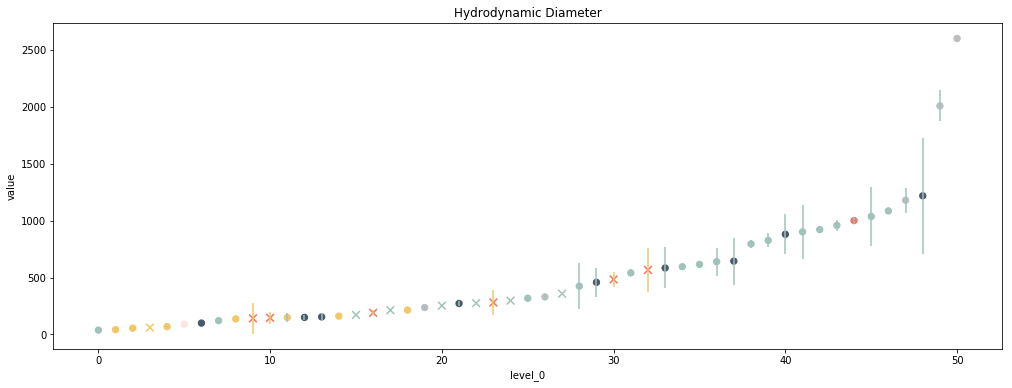

In [117]:
ax = df_plot[df_plot.KE=="DNA damage"].plot(kind = "scatter", x = "level_0", y = "value", title="Hydrodynamic Diameter",
                      color = df_plot[df_plot.KE=="DNA damage"].kind, yerr = df_plot[df_plot.KE=="DNA damage"].stdev, 
                                    figsize = (17, 6), 
                      s=60, marker =  'x')

df_plot[df_plot.KE!="DNA damage"].plot(kind = "scatter", x = "level_0", y = "value",
                              color = df_plot[df_plot.KE!="DNA damage"].kind, 
                              yerr = df_plot[df_plot.KE!="DNA damage"].stdev, figsize = (17, 6),
                              s=40, marker =  'o', ax=ax)



In [ ]:
# df4 = pd.concat([df_DNA, df_not_DNA]).sort_values(by="value").reset_index()

In [ ]:
# df4.plot(kind = "scatter", x = "level_0", y = "value", title="Zeta Potential",
#                       color = df4.kind, yerr = df4.stdev, 
#                                     figsize = (17, 6), 
#                       s=60, marker =  'x')

In [ ]:
ax = df_DNA.reset_index().plot(kind = "scatter", x = "index", y = "value", title="Hydrodynamic Diameter",
                      color = df_DNA.kind, yerr = df_DNA.stdev, 
                                    figsize = (17, 6), 
                      s=60, marker =  'x')

df_not_DNA.reset_index().plot(kind = "scatter", x = "index", y = "value",
                              color = df_not_DNA.reset_index().kind, 
                              yerr = df_not_DNA.reset_index().stdev, figsize = (17, 6),
                              s=40, marker =  'o', ax=ax)

plt.show()